### Pytorch - classifier
- 목표: CNN을 활용한 모델을 만들어서 MNIST에 대하여 정확도 95% 이상의 Classifier를 만들기

In [1]:
from matplotlib import pyplot as plt
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # don't care about this

torch.manual_seed(0) # seed 고정 - 여러번 실행해도 같은 결과가 나오도록 설정

#### Dataset download

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
dataloader_train = DataLoader(train_data, 
                              batch_size=16, 
                              shuffle=True)

test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)
dataloader_test = DataLoader(test_data, 
                              batch_size=16, 
                              shuffle=True)


Failed to download (trying next):
HTTP Error 404: Not Found



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/home/piai/anaconda3/envs/cv_2025/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### Check images

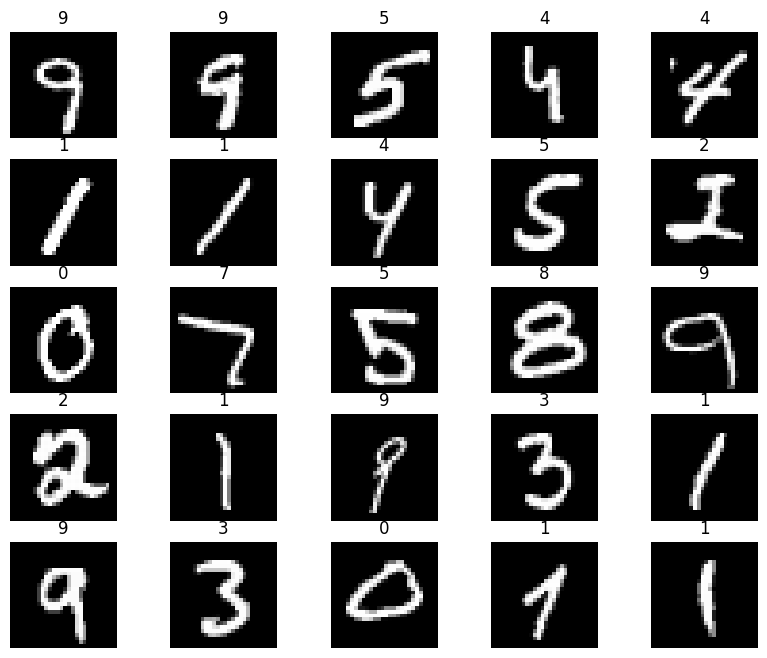

Data shape: torch.Size([1, 28, 28])


In [3]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray") # For MNIST dataset
plt.show()
print('Data shape:', img.shape)


#### CNN

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output   # return x for visualization

#### Train

In [5]:
# Initialize model and move the model to GPU memory
cnn = CNN()

# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Define the optimizer again
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)

In [6]:
import time

cnn = CNN()
loss_func = nn.CrossEntropyLoss()   
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   

# Train the model
num_epochs = 3 # MNIST dataset을 세 번 반복하여 학습
cnn.train()

start = time.time()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(dataloader_train):
        # Inference
        output = cnn(images)           

        # Calculate loss
        loss = loss_func(output, labels)

        # clear gradients for this training step   
        optimizer.zero_grad()           

        # backpropagation, compute gradients 
        loss.backward()    
        # apply gradients             
        optimizer.step()                

        if (i+1) % 500 == 0:
            print ('Epoch [{}/{}], Step [{}], Loss: {:.4f}' 
                   .format(epoch + 1, num_epochs, i + 1, loss.item()))
            
elapsed_time = time.time()-start
print(f"elapsed time : {elapsed_time} sec")

/home/piai/anaconda3/envs/cv_2025/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/3], Step [500], Loss: 0.6228
Epoch [1/3], Step [1000], Loss: 0.2856
Epoch [1/3], Step [1500], Loss: 0.0361
Epoch [1/3], Step [2000], Loss: 0.6274
Epoch [1/3], Step [2500], Loss: 0.3913
Epoch [1/3], Step [3000], Loss: 0.0089
Epoch [1/3], Step [3500], Loss: 0.0022
Epoch [2/3], Step [500], Loss: 0.0002
Epoch [2/3], Step [1000], Loss: 0.0099
Epoch [2/3], Step [1500], Loss: 0.0059
Epoch [2/3], Step [2000], Loss: 0.0909
Epoch [2/3], Step [2500], Loss: 0.0030
Epoch [2/3], Step [3000], Loss: 0.2131
Epoch [2/3], Step [3500], Loss: 0.1581
Epoch [3/3], Step [500], Loss: 0.0271
Epoch [3/3], Step [1000], Loss: 0.0052
Epoch [3/3], Step [1500], Loss: 0.0133
Epoch [3/3], Step [2000], Loss: 0.0978
Epoch [3/3], Step [2500], Loss: 0.5325
Epoch [3/3], Step [3000], Loss: 0.0665
Epoch [3/3], Step [3500], Loss: 0.2078
elapsed time : 91.33777332305908 sec


#### Test

In [7]:
cnn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloader_test:
        # Inference
        test_output = cnn(images)

        # Calculate error
        pred_y = torch.max(test_output, 1)[1].data.squeeze() # max 를 통해 가장 확률이 높은 숫자를 선택
        correct += (pred_y == labels).sum().item() # 가장 확률이 높은 숫자인 pred_y와 label이 같으면 정답 - 정답인 개수 확인
        total += labels.size(0) 
    accuracy = correct / total * 100
    
print('Test Accuracy of the model on the 10000 test images: %.2f Percent' % accuracy)

Test Accuracy of the model on the 10000 test images: 96.48 Percent


#### GPU Acceleration

In [8]:
# Initialize model and move the model to GPU memory
cnn = CNN().cuda()

# Define the loss function
loss_func = nn.CrossEntropyLoss()

# Define the optimizer again
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)

In [9]:
import time

cnn = CNN().cuda()
loss_func = nn.CrossEntropyLoss()   
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   

# Train the model
num_epochs = 3 # MNIST dataset을 세 번 반복하여 학습
cnn.train()

start = time.time()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(dataloader_train):
        # Move data to GPU memory
        images = images.cuda()
        labels = labels.cuda()

        # Inference
        output = cnn(images)           

        # Calculate loss
        loss = loss_func(output, labels)

        # clear gradients for this training step   
        optimizer.zero_grad()           

        # backpropagation, compute gradients 
        loss.backward()    
        # apply gradients             
        optimizer.step()                

        if (i+1) % 500 == 0:
            print ('Epoch [{}/{}], Step [{}], Loss: {:.4f}' 
                   .format(epoch + 1, num_epochs, i + 1, loss.item()))

elapsed_time = time.time()-start
print(f"elapsed time : {elapsed_time} sec")

Epoch [1/3], Step [500], Loss: 0.0807
Epoch [1/3], Step [1000], Loss: 0.0495
Epoch [1/3], Step [1500], Loss: 0.0338
Epoch [1/3], Step [2000], Loss: 0.0051
Epoch [1/3], Step [2500], Loss: 0.2790
Epoch [1/3], Step [3000], Loss: 0.0480
Epoch [1/3], Step [3500], Loss: 0.0112
Epoch [2/3], Step [500], Loss: 0.4503
Epoch [2/3], Step [1000], Loss: 0.2077
Epoch [2/3], Step [1500], Loss: 0.1312
Epoch [2/3], Step [2000], Loss: 0.2220
Epoch [2/3], Step [2500], Loss: 0.0104
Epoch [2/3], Step [3000], Loss: 0.3933
Epoch [2/3], Step [3500], Loss: 0.0090
Epoch [3/3], Step [500], Loss: 0.0442
Epoch [3/3], Step [1000], Loss: 0.0835
Epoch [3/3], Step [1500], Loss: 0.0064
Epoch [3/3], Step [2000], Loss: 0.0298
Epoch [3/3], Step [2500], Loss: 0.1432
Epoch [3/3], Step [3000], Loss: 0.0005
Epoch [3/3], Step [3500], Loss: 0.0881
elapsed time : 52.211050033569336 sec


In [10]:
cnn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloader_test:
        # Move data to GPU memory
        images = images.cuda()
        labels = labels.cuda()

        # Inference
        test_output = cnn(images)
        
        # Calculate error
        pred_y = torch.max(test_output, 1)[1].data.squeeze() # max 를 통해 가장 확률이 높은 숫자를 선택
        correct += (pred_y == labels).sum().item() # 가장 확률이 높은 숫자인 pred_y와 label이 같으면 정답 - 정답인 개수 확인
        total += labels.size(0) 
    accuracy = correct / total * 100
    
print('Test Accuracy of the model on the 10000 test images: %.2f Percent' % accuracy)

Test Accuracy of the model on the 10000 test images: 97.18 Percent


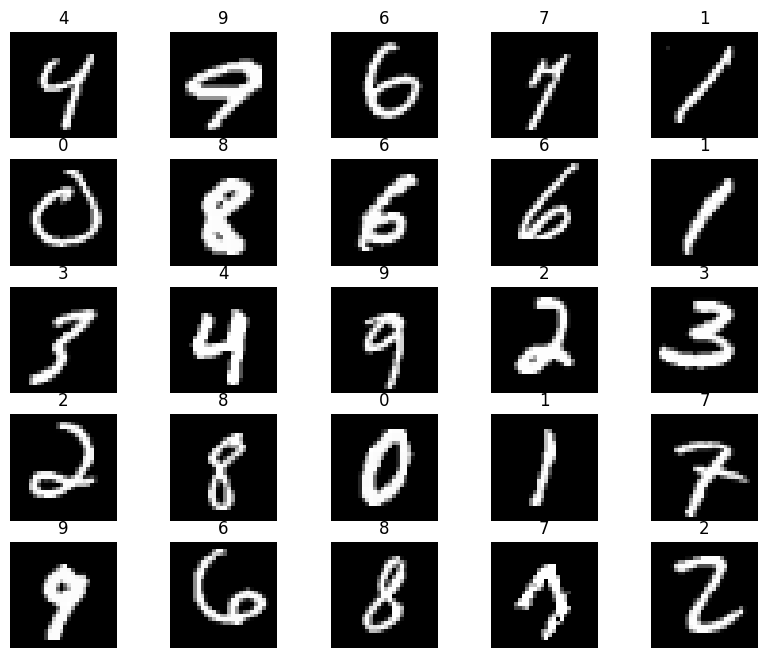

Data shape: torch.Size([1, 28, 28])


In [11]:

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()
print('Data shape:', img.shape)